# Importando as bibliotecas

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import pytz


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indicium-teste-seleo-analista/colaborador_agencia.csv
/kaggle/input/indicium-teste-seleo-analista/colaboradores.csv
/kaggle/input/indicium-teste-seleo-analista/propostas_credito.csv
/kaggle/input/indicium-teste-seleo-analista/agencias.csv
/kaggle/input/indicium-teste-seleo-analista/contas.csv
/kaggle/input/indicium-teste-seleo-analista/clientes.csv
/kaggle/input/indicium-teste-seleo-analista/transacoes.csv


# Importando arquivos

## Agências

In [2]:
df_agencias = pd.read_csv("/kaggle/input/indicium-teste-seleo-analista/agencias.csv",index_col='cod_agencia')
print(f"Quantidade de Agências: {df_agencias.shape[0]}")
df_agencias.sample(10)

Quantidade de Agências: 10


,nome,endereco,cidade,uf,data_abertura,tipo_agencia
cod_agencia,,,,,,
2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
10,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física


## Clientes

In [3]:
df_clientes = pd.read_csv("/kaggle/input/indicium-teste-seleo-analista/clientes.csv",
                          index_col='cod_cliente')
print(f"Quantidade de Clientes: {df_clientes.shape[0]}")
df_clientes.sample(n=10)

Quantidade de Clientes: 998


,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
cod_cliente,,,,,,,,,
814,Diogo,Vieira,xribeiro@example.com,PF,2014-09-09 14:55:00 UTC,805.469.132-70,1960-08-24,"Núcleo Lopes, 101 Vila São Gabriel Jacui 50247...",20079-824
450,Thales,Lopes,uda-mata@example.com,PF,2019-04-01 12:40:00 UTC,503.681.924-15,1964-02-24,"Esplanada Sales, 2 Califórnia 01064869 Melo / SE",88390892
973,Carlos Eduardo,Pires,emanuella37@example.net,PF,2020-12-25 15:51:00 UTC,745.983.062-38,1944-11-25,"Praia Emilly Fernandes, 1 Vila Nova Gameleira ...",99049657
953,Miguel,Vieira,lucas-gabriel49@example.com,PF,2015-06-11 15:05:00 UTC,049.571.362-70,1950-12-13,"Sítio Emanuella Araújo, 14 Vila Jardim Alvorad...",08810805
73,Milena,Jesus,xvieira@example.com,PF,2012-06-21 14:25:00 UTC,925.037.416-06,1988-09-12,"Parque Araújo, 352 Estoril 11290-320 Pinto da ...",74802-721
158,Leonardo,Cavalcanti,luiz-otavioporto@example.net,PF,2018-10-22 15:47:00 UTC,429.061.875-85,2006-11-25,"Ladeira da Costa, 43 Lorena 14774659 Carvalho ...",26418948
743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
539,Benjamin,Silveira,lda-mata@example.com,PF,2011-04-21 10:58:00 UTC,983.416.270-78,1960-06-05,"Chácara Campos, 85 Boa União 1ª Seção 87856223...",02025883
265,Heitor,Melo,vitor-gabrielmonteiro@example.com,PF,2019-06-05 11:17:00 UTC,598.067.321-03,1989-10-25,"Vila Gonçalves, 11 Pousada Santo Antonio 46466...",96975888


Verifica-se a coluna "cep" com formatos variados, a serem tratados futuramente.

## Colaboradores

In [4]:
df_colaboradores = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/colaboradores.csv')
print(f'Quantidade de colaboradores: {df_colaboradores.shape[0]}')
df_colaboradores.head()

Quantidade de colaboradores: 100


,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305
4,39,Maria Eduarda,Melo,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390


## Agência de lotação dos colaboradores 

In [5]:
df_colaborador_agencia = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/colaborador_agencia.csv')
print(f'Quantidade de colaboradores: {df_colaborador_agencia.shape[0]}')
df_colaborador_agencia.head()


Quantidade de colaboradores: 100


,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1


Nota-se que esta planilha possui uma linha para cada código de colaborador da base de dados anterior e cada um deles está vinculado a uma agência.

## Contas bancárias


In [6]:
df_contas = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/contas.csv')
print(f'Quantidade de contas abertas: {df_contas.shape[0]}')
df_contas.sample(10)

Quantidade de contas abertas: 999


,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
300,580,580,4,3,PF,2014-05-04 13:13:00 UTC,17823.1248,17114.17,2022-12-29 23:59:59.585665 UTC
538,887,887,7,20,PF,2021-02-27 11:43:00 UTC,17067.4790,15458.46,2022-12-30 00:00:00.726093 UTC
589,622,622,7,26,PF,2018-01-24 14:45:00 UTC,2143.1398,1912.43,2022-12-30 00:00:00 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC
444,958,958,6,29,PF,2018-10-09 15:05:00 UTC,10828.3824,8596.76,2022-12-22 00:14:33 UTC
883,214,214,7,86,PF,2017-04-04 14:29:00 UTC,62.2986,51.56,2022-12-29 23:59:59.589471 UTC
716,482,482,7,64,PF,2019-08-23 11:22:00 UTC,67872.9700,67382.17,2022-12-26 18:18:07 UTC
21,108,108,1,23,PF,2017-04-13 12:21:00 UTC,1171.4528,812.56,2022-12-29 23:59:59.646511 UTC
430,641,641,6,16,PF,2019-12-07 13:32:00 UTC,1.3081,744.27,2022-12-29 23:59:59.205176 UTC
384,328,328,5,43,PF,2017-03-04 13:03:00 UTC,36948.7110,33788.96,2019-05-02 05:36:42 UTC


Como foi observado que são 998 clientes cadastrados e 999 contas, pelo menos um cliente possui mais d euma conta bancária cadastrada.

## Propostas de crédito

In [7]:
df_credito = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/propostas_credito.csv')
df_credito = df_credito.set_index(df_credito['cod_proposta'])
print(f'Quantidade de propostas de crédito cadastradas: {df_credito.shape[0]}')
df_credito.sample(10)

Quantidade de propostas de crédito cadastradas: 2000


,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
cod_proposta,,,,,,,,,,,,
1540,1540,984,16,2022-03-17 00:37:06 UTC,0.0237,134454.662571,170958.40,36503.737429,3953.806589,70,3,Enviada
1898,1898,661,55,2017-01-17 03:41:12 UTC,0.0186,112496.490612,219120.32,106623.829388,2366.373628,117,1,Em análise
852,852,820,64,2016-10-26 23:16:07 UTC,0.0093,129417.959548,205114.45,75696.490452,4246.790715,36,2,Aprovada
85,85,236,11,2012-11-18 18:25:42 UTC,0.0113,52410.159429,68065.87,15655.710571,842.605506,108,4,Validação documentos
1982,1982,531,76,2022-05-21 06:01:35 UTC,0.0203,86822.749875,136106.33,49283.580125,3002.670044,44,3,Validação documentos
1627,1627,651,54,2010-09-11 16:37:09 UTC,0.0229,102199.633516,152867.12,50667.486484,2579.755420,105,1,Validação documentos
1376,1376,257,61,2022-02-26 21:19:04 UTC,0.0194,1247.576979,2396.47,1148.893021,29.071785,93,5,Aprovada
978,978,659,46,2013-11-19 15:32:03 UTC,0.0146,123652.697590,229884.11,106231.412410,2958.553252,65,2,Enviada
807,807,198,32,2019-08-12 10:18:04 UTC,0.0211,122758.140110,144641.60,21883.459890,7032.485094,22,3,Aprovada


## Transações bancárias

In [8]:
df_transacoes = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/transacoes.csv')
print(f'Quantidade de transações cadastradas: {df_transacoes.shape[0]}')
df_transacoes.sample(10)

Quantidade de transações cadastradas: 71999


,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
36857,10753,609,2017-06-15 12:11:51 UTC,Compra Crédito,-16.94
18394,7882,987,2014-11-22 20:19:05 UTC,Compra Débito,-24.28
34727,17904,843,2019-11-06 13:41:29 UTC,Compra Crédito,-9.76
23369,68150,881,2022-12-29 23:50:55 UTC,Pix - Recebido,153.20
54831,63221,51,2022-12-29 23:59:59.832228 UTC,Pix - Realizado,-243.10
21170,60550,8,2022-12-29 18:39:44 UTC,Pix - Recebido,976.70
38909,33354,629,2019-10-19 22:14:30 UTC,Compra Crédito,-37.34
57325,60219,99,2022-12-30 00:00:00.33573 UTC,Pix - Realizado,-891.00
51569,40306,504,2019-02-15 15:01:27 UTC,Compra Crédito,-40.68
47071,58799,710,2022-05-13 00:06:18 UTC,Compra Crédito,-95.49


# Tratamento dos dados

## Agências

In [9]:
# Separando o endereço em logradouro, número de logradouro e bairro. 
# Cidade e UF já possuem colunas próprias 
df_agencias['logradouro'] = df_agencias.endereco.apply(lambda x: x.split(',')[0])
df_agencias['no_logradouro'] = df_agencias.endereco.apply(lambda x: x.split(',')[1].split('-')[0])
df_agencias['bairro'] = df_agencias.endereco.apply(lambda x: x.split(',')[1].split('-')[1])
df_agencias = df_agencias.drop('endereco', axis=1)
df_agencias['nome_completo'] = df_agencias.nome + ' - ' + df_agencias.cidade + '/' + df_agencias.uf
df_agencias

,nome,cidade,uf,data_abertura,tipo_agencia,logradouro,no_logradouro,bairro,nome_completo
cod_agencia,,,,,,,,,
7,Agência Digital,São Paulo,SP,2015-08-01,Digital,Av. Paulista,1436,Cerqueira César,Agência Digital - São Paulo/SP
1,Agência Matriz,São Paulo,SP,2010-01-01,Física,Av. Paulista,1436,Cerqueira César,Agência Matriz - São Paulo/SP
2,Agência Tatuapé,São Paulo,SP,2010-06-14,Física,Praça Sílvio Romero,158,Tatuapé,Agência Tatuapé - São Paulo/SP
3,Agência Campinas,Campinas,SP,2012-03-04,Física,Av. Francisco Glicério,895,Vila Lidia,Agência Campinas - Campinas/SP
4,Agência Osasco,Osasco,SP,2013-11-06,Física,Av. Antônio Carlos Costa,1000,Bela Vista,Agência Osasco - Osasco/SP
5,Agência Porto Alegre,Porto Alegre,RS,2013-12-01,Física,Av. Bento Gonçalves,1924,Partenon,Agência Porto Alegre - Porto Alegre/RS
6,Agência Rio de Janeiro,Rio de Janeiro,RJ,2015-04-01,Física,R. Sen. Dantas,15,Centro,Agência Rio de Janeiro - Rio de Janeiro/RJ
8,Agência Jardins,São Paulo,SP,2018-01-09,Física,Av. Brg. Faria Lima,2491,Jardim Paulistano,Agência Jardins - São Paulo/SP
9,Agência Florianópolis,Florianópolis,SC,2019-10-09,Física,Av. Jorn. Rubéns de Arruda Ramos,1280,Centro,Agência Florianópolis - Florianópolis/SC


Optou-se por avaliar as agências por quantidade de meses para análises futuras.

In [10]:
df_agencias['data_abertura_agencia'] = pd.to_datetime(df_agencias.data_abertura,format='%Y-%m-%d')
now = datetime.now()
df_agencias['tempo_agencia_meses'] = df_agencias['data_abertura_agencia'].apply(lambda x: relativedelta(now,x).months + relativedelta(now,x).years*12)
df_agencias[['data_abertura_agencia','tempo_agencia_meses']].describe().T
df_agencias = df_agencias.drop('data_abertura', axis=1)

In [11]:
df_agencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 7 to 10
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   nome                   10 non-null     object        
 1   cidade                 10 non-null     object        
 2   uf                     10 non-null     object        
 3   tipo_agencia           10 non-null     object        
 4   logradouro             10 non-null     object        
 5   no_logradouro          10 non-null     object        
 6   bairro                 10 non-null     object        
 7   nome_completo          10 non-null     object        
 8   data_abertura_agencia  10 non-null     datetime64[ns]
 9   tempo_agencia_meses    10 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 880.0+ bytes


## Clientes

In [12]:
# Convertendo as datas no formato correto
df_clientes['data_nascimento_parsed'] = pd.to_datetime(df_clientes.data_nascimento, format='%Y-%m-%d').dt.tz_localize(None)
df_clientes['data_inclusao_parsed'] = pd.to_datetime(df_clientes.data_inclusao).dt.tz_localize(None)

# Calculando valores de tempo
df_clientes['tempo_inclusao_anos'] = df_clientes.data_inclusao_parsed.apply(lambda x: (pd.to_datetime('now').tz_localize(None) - x).days/365).round()
df_clientes['idade_cliente'] = df_clientes.data_nascimento_parsed.apply(lambda x: (pd.to_datetime('now') - x).days/365).round()

df_clientes[['tempo_inclusao_anos','data_inclusao_parsed','data_nascimento_parsed','idade_cliente']]


,tempo_inclusao_anos,data_inclusao_parsed,data_nascimento_parsed,idade_cliente
cod_cliente,,,,
28,7.0,2017-04-03 16:11:00,2006-08-11,18.0
674,3.0,2021-02-10 13:27:00,1995-10-11,28.0
693,4.0,2020-01-21 13:12:00,1948-11-19,75.0
743,5.0,2019-05-06 11:39:00,1978-01-27,46.0
769,7.0,2017-01-07 14:53:00,1990-08-25,33.0
...,...,...,...,...
730,5.0,2019-05-02 11:22:00,1966-03-06,58.0
772,7.0,2017-06-08 11:13:00,1971-07-20,53.0
837,10.0,2014-03-18 10:30:00,1944-06-03,80.0


In [13]:
# Retirando os hifens do CEP dos clientes
df_clientes['cep'] = df_clientes.cep.apply(lambda x: x.replace('-',''))
df_clientes.cep.sample(10)

cod_cliente
284    00023304
210    44811766
759    72563332
350    07473442
671    75614912
30     93782527
959    87123267
311    08342543
534    68532892
819    36872995
Name: cep, dtype: object

## Colaboradores

Primeiramente, vamos concatenar as 3 tabelas (df_agencias, df_colaboradores e df_colaborador_agencia) a fim de adicionar o nome completo da agência "nome - Município/UF" onde está lotado cada colaborador.

In [14]:
df_contas_interm = pd.merge(df_colaborador_agencia, df_agencias.nome_completo, on='cod_agencia', how='left')
df_colaboradores = pd.merge(df_colaboradores, df_contas_interm[['cod_colaborador','nome_completo','cod_agencia']], on='cod_colaborador', how='left')
df_colaboradores.sample(10)


,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep,nome_completo,cod_agencia
16,53,Helena,Lopes,antoniomonteiro@example.org,928.706.341-96,1990-10-08,"Área Enrico Caldeira, 9 Santa Cecilia 37808172...",48143-984,Agência Rio de Janeiro - Rio de Janeiro/RJ,6
24,36,Marcela,Rocha,henriqueda-luz@example.com,503.247.891-14,1963-07-16,"Ladeira de Porto, 9 Distrito Industrial Do Jat...",42103-068,Agência Porto Alegre - Porto Alegre/RS,5
80,58,Ana Julia,Ferreira,lorena19@example.com,945.218.603-89,1994-02-22,"Vale Rezende, 4 São Geraldo 84460438 da Concei...",33395-564,Agência Matriz - São Paulo/SP,1
54,83,Julia,Barbosa,da-luzcarolina@example.com,149.853.026-51,1993-11-04,"Esplanada de da Conceição, 52 Satelite 42238-3...",41497222,Agência Matriz - São Paulo/SP,1
95,94,Melissa,Gonçalves,caldeirasamuel@example.com,825.670.139-03,1971-01-09,"Largo de Pinto, 96 Vila Independencia 2ª Seção...",66939-843,Agência Jardins - São Paulo/SP,8
59,33,Elisa,Correia,leandro34@example.net,965.832.147-09,1993-02-23,"Morro de Souza, 84 Distrito Industrial Do Jato...",50769-513,Agência Jardins - São Paulo/SP,8
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674,Agência Matriz - São Paulo/SP,1
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305,Agência Campinas - Campinas/SP,3
10,76,Ana Júlia,Gomes,davi-luccacardoso@example.org,461.837.095-57,1985-09-13,"Viaduto Rezende, 33 Beira Linha 94699659 Fogaç...",73793-541,Agência Porto Alegre - Porto Alegre/RS,5
33,62,Arthur,Campos,oviana@example.org,381.657.092-59,1973-12-28,"Conjunto Alves, 8 Santa Amelia 36469-502 da Mo...",16596-292,Agência Matriz - São Paulo/SP,1


## Contas

In [15]:
df_contas.data_ultimo_lancamento.sample()

581    2022-12-30 00:00:00.420726 UTC
Name: data_ultimo_lancamento, dtype: object

In [16]:
# transformando a data de último lançamento em formato data
df_contas['data_ultimo_lancamento_conta'] = pd.to_datetime(df_contas.data_ultimo_lancamento,
                                                            format='mixed')
df_contas['data_abertura_conta'] = pd.to_datetime(df_contas.data_abertura,
                                                            format='mixed')
df_contas = df_contas.drop('data_ultimo_lancamento', axis=1)
df_contas = df_contas.drop('data_abertura', axis=1)



In [17]:
df_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   num_conta                     999 non-null    int64              
 1   cod_cliente                   999 non-null    int64              
 2   cod_agencia                   999 non-null    int64              
 3   cod_colaborador               999 non-null    int64              
 4   tipo_conta                    999 non-null    object             
 5   saldo_total                   999 non-null    float64            
 6   saldo_disponivel              999 non-null    float64            
 7   data_ultimo_lancamento_conta  999 non-null    datetime64[ns, UTC]
 8   data_abertura_conta           999 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(1)
memory usage: 70.4+ KB


In [18]:
hoje = datetime.now(pytz.utc)
hoje = hoje.astimezone(pytz.timezone('UTC'))


df_contas['dias_inativo'] = (hoje - df_contas.data_ultimo_lancamento_conta).dt.days

df_contas[['tipo_conta','data_ultimo_lancamento_conta','dias_inativo']]

,tipo_conta,data_ultimo_lancamento_conta,dias_inativo
0,PF,2019-07-02 11:03:46+00:00,1686
1,PF,2021-03-25 12:00:15+00:00,1054
2,PF,2016-09-09 23:34:15+00:00,2712
3,PF,2022-12-28 07:58:24+00:00,411
4,PF,2013-12-20 22:20:00+00:00,3706
...,...,...,...
994,PF,2022-12-30 00:00:00.319185+00:00,410
995,PF,2022-12-29 23:59:59.964121+00:00,410
996,PF,2022-12-30 00:00:00.966349+00:00,410
997,PF,2022-12-30 00:00:00.607818+00:00,410


### Extraindo os nomes das agências para esta tabela

In [19]:
df_contas_interm = pd.merge(df_contas, df_agencias, on='cod_agencia', how='left')
df_contas_total = pd.merge(df_contas_interm, df_colaboradores, on='cod_colaborador', how='left')

print(df_contas.shape,df_colaboradores.shape,df_agencias.shape,df_contas_total.shape)
df_contas_total

(999, 10) (100, 10) (10, 10) (999, 29)


,num_conta,cod_cliente,cod_agencia_x,cod_colaborador,tipo_conta,saldo_total,saldo_disponivel,data_ultimo_lancamento_conta,data_abertura_conta,dias_inativo,...,tempo_agencia_meses,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep,nome_completo_y,cod_agencia_y
0,53,53,1,7,PF,2984.7615,2814.67,2019-07-02 11:03:46+00:00,2011-05-24 15:30:00+00:00,1686,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
1,190,190,1,7,PF,4262.4322,4191.86,2021-03-25 12:00:15+00:00,2014-10-17 14:48:00+00:00,1054,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
2,191,191,1,7,PF,3266.5680,3080.71,2016-09-09 23:34:15+00:00,2013-03-23 14:14:00+00:00,2712,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
3,203,203,1,7,PF,21241.5424,19461.56,2022-12-28 07:58:24+00:00,2016-08-03 16:13:00+00:00,411,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
4,254,254,1,7,PF,13335.6966,13197.54,2013-12-20 22:20:00+00:00,2012-10-24 13:48:00+00:00,3706,...,169,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328,Agência Matriz - São Paulo/SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,466,466,10,8,PF,7847.4165,9351.63,2022-12-30 00:00:00.319185+00:00,2022-10-26 14:13:00+00:00,410,...,28,Vitor Gabriel,Caldeira,csilva@example.net,853.624.091-15,1973-07-11,"Jardim da Luz, 96 Rio Branco 42420423 da Mata ...",66925-534,Agência Recife - Recife/PE,10
995,764,764,10,8,PF,65495.1872,64823.14,2022-12-29 23:59:59.964121+00:00,2022-09-08 11:06:00+00:00,410,...,28,Vitor Gabriel,Caldeira,csilva@example.net,853.624.091-15,1973-07-11,"Jardim da Luz, 96 Rio Branco 42420423 da Mata ...",66925-534,Agência Recife - Recife/PE,10
996,488,488,10,18,PF,8663.6081,6836.57,2022-12-30 00:00:00.966349+00:00,2022-07-16 10:16:00+00:00,410,...,28,Maria Vitória,Duarte,almeidacaroline@example.net,047.836.592-65,1963-12-24,"Setor Thiago da Rocha, 9 Independência 55260-9...",29043497,Agência Recife - Recife/PE,10
997,395,395,10,95,PF,23156.2065,21578.33,2022-12-30 00:00:00.607818+00:00,2022-12-01 15:27:00+00:00,410,...,28,Juliana,Cavalcanti,gomesmanuela@example.org,309.764.251-06,1982-05-18,Trevo de Duarte Nossa Senhora Do Rosário 41440...,52427-851,Agência Recife - Recife/PE,10


## Propostas de crédito

In [20]:
# transformando a data de último lançamento em formato data
df_credito['data_entrada_proposta_parsed'] = pd.to_datetime(df_credito.data_entrada_proposta,
                                                            format='mixed')
df_credito = df_credito.drop('data_entrada_proposta', axis=1)
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 116 to 1562
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   cod_proposta                  2000 non-null   int64              
 1   cod_cliente                   2000 non-null   int64              
 2   cod_colaborador               2000 non-null   int64              
 3   taxa_juros_mensal             2000 non-null   float64            
 4   valor_proposta                2000 non-null   float64            
 5   valor_financiamento           2000 non-null   float64            
 6   valor_entrada                 2000 non-null   float64            
 7   valor_prestacao               2000 non-null   float64            
 8   quantidade_parcelas           2000 non-null   int64              
 9   carencia                      2000 non-null   int64              
 10  status_proposta               2000 non-

## Transações bancárias

In [21]:
df_transacoes['data_transacao_parsed'] = pd.to_datetime(df_transacoes['data_transacao'],format='mixed')
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   cod_transacao          71999 non-null  int64              
 1   num_conta              71999 non-null  int64              
 2   data_transacao         71999 non-null  object             
 3   nome_transacao         71999 non-null  object             
 4   valor_transacao        71999 non-null  float64            
 5   data_transacao_parsed  71999 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 3.3+ MB


# Exploração dos dados

## Agências
Primeiramente, avaliemos a quantidade de agências por estado.

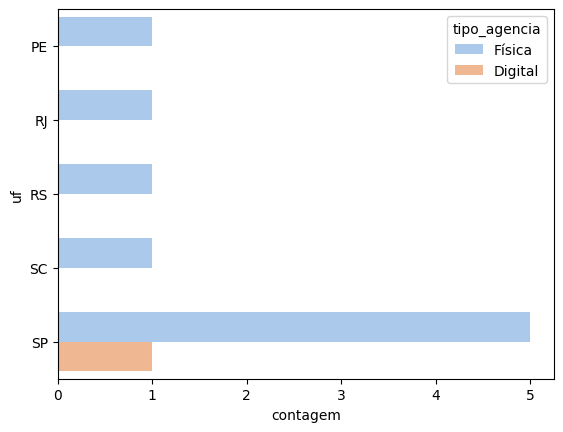

In [22]:
#contagem de agências
df_cont_agencia = df_agencias.groupby(['uf','tipo_agencia']).size().reset_index(name='contagem')


sns.barplot(data=df_cont_agencia,
              y = 'uf',
            x = 'contagem',
             hue = 'tipo_agencia',
             #dodge="auto",
             palette='pastel')

plt.show()

## Colaboradores por agência

Avaliemos a quantidade de colaboradores por agência.

In [23]:
df_colaboradores[['cod_colaborador','nome_completo']].groupby(['nome_completo']).count()

,cod_colaborador
nome_completo,
Agência Campinas - Campinas/SP,11
Agência Digital - São Paulo/SP,7
Agência Florianópolis - Florianópolis/SC,8
Agência Jardins - São Paulo/SP,7
Agência Matriz - São Paulo/SP,16
Agência Osasco - Osasco/SP,4
Agência Porto Alegre - Porto Alegre/RS,13
Agência Recife - Recife/PE,10
Agência Rio de Janeiro - Rio de Janeiro/RJ,11


No gráfico, temos que:

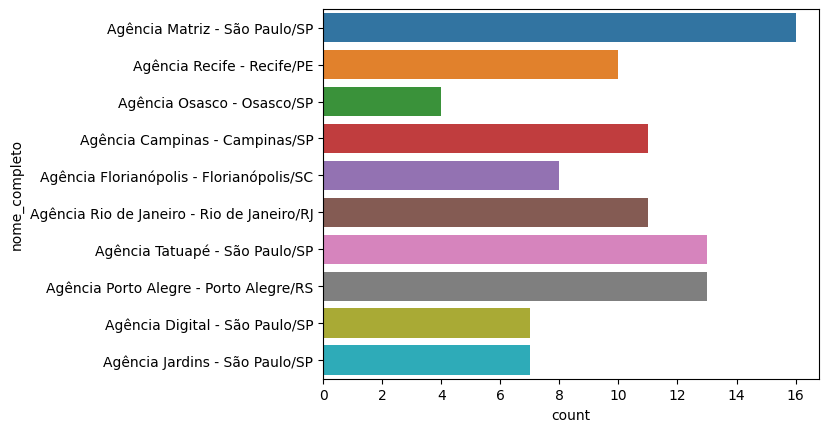

In [24]:
sns.countplot(data=df_colaboradores,
             y=df_colaboradores.nome_completo)
plt.show()

Temos que a agência Matriz em São Paulo possui a maior quantidade de colaboradores.

## Quantidade de contas por agência

Plotando a quantidade de contas por agência, temos a seguinte visualização:

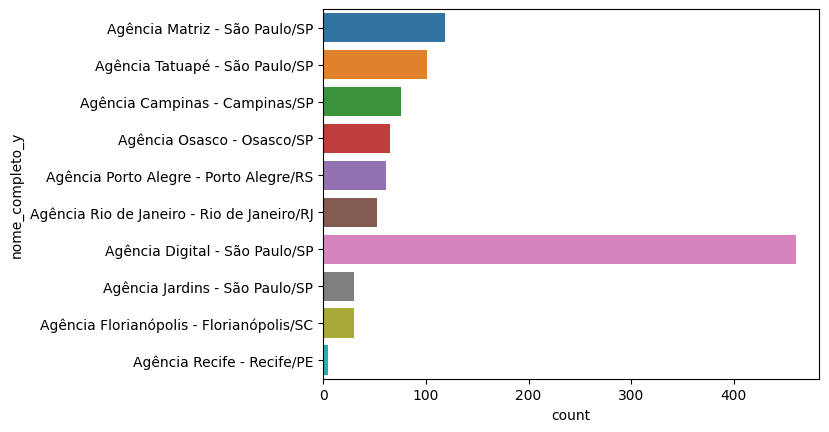

In [25]:
graf1= sns.countplot(data = df_contas_total,
                    y = 'nome_completo_y')
plt.show()

## KPI Eficiência da Agência (Clientes por Colaboradores)

Agora vamos avaliar a quantidade de colaboradores de cada agência e relacionar com a qauantidade de contas que cada agência possui.

Desta forma, objetivamos encontrar um indicador de eficiência.

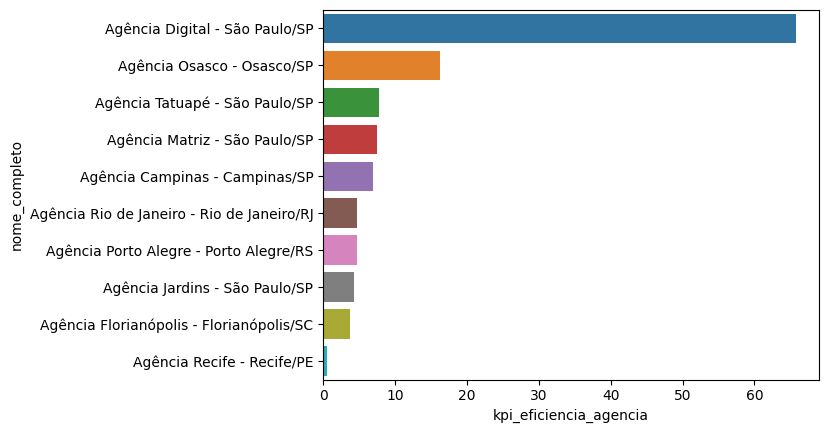

In [26]:
#conta colaboradores por agência
df_estatistica_eficiencia = df_colaboradores[['cod_colaborador','nome_completo']].groupby('nome_completo').count()
df_estatistica_eficiencia = df_estatistica_eficiencia.rename(columns = {'cod_colaborador': 'qtd_colaboradores'})

#conta contas por agência
df_estatistica_eficiencia['qtd_contas'] = df_contas_total[['nome_completo_y','num_conta']] .groupby('nome_completo_y').count()

#calcula indicador de eficiência
df_estatistica_eficiencia['kpi_eficiencia_agencia'] = df_estatistica_eficiencia.qtd_contas / df_estatistica_eficiencia.qtd_colaboradores
df_estatistica_eficiencia = df_estatistica_eficiencia.sort_values(by='kpi_eficiencia_agencia', ascending=False)
sns.barplot(x = df_estatistica_eficiencia.kpi_eficiencia_agencia,
            y =df_estatistica_eficiencia.index)
plt.show()

## Linha do tempo de Criação de contas

In [27]:
df_quant_contas = df_contas_total[['data_abertura_conta','num_conta','nome_completo_y',
                                   'data_abertura_agencia']].sort_values('data_abertura_conta')
df_quant_contas = df_quant_contas.rename(columns = {'nome_completo_y': 'nome_agencia'})

# calculando ano conta
df_quant_contas['ano_abertura_conta'] = df_quant_contas.data_abertura_conta.dt.year

# calculando ano agência
df_quant_contas['ano_abertura_agencia'] = df_quant_contas.data_abertura_agencia.dt.year


# Calculando quantidade de contas cumulativa
df_quant_contas['qtd_contas'] = None
df_quant_contas['qtd_contas'] = range(1, len(df_quant_contas) + 1)

df_quant_contas.sample(10)

,data_abertura_conta,num_conta,nome_agencia,data_abertura_agencia,ano_abertura_conta,ano_abertura_agencia,qtd_contas
464,2018-11-03 12:58:00+00:00,386,Agência Rio de Janeiro - Rio de Janeiro/RJ,2015-04-01,2018,2015,482
969,2021-11-02 11:34:00+00:00,111,Agência Florianópolis - Florianópolis/SC,2019-10-09,2021,2019,842
944,2022-01-14 13:16:00+00:00,453,Agência Jardins - São Paulo/SP,2018-01-09,2022,2018,866
478,2016-09-25 14:39:00+00:00,31,Agência Digital - São Paulo/SP,2015-08-01,2016,2015,278
901,2021-07-10 11:51:00+00:00,563,Agência Digital - São Paulo/SP,2015-08-01,2021,2015,794
986,2020-05-12 12:40:00+00:00,512,Agência Florianópolis - Florianópolis/SC,2019-10-09,2020,2019,660
615,2022-05-22 12:02:00+00:00,941,Agência Digital - São Paulo/SP,2015-08-01,2022,2015,902
547,2021-04-03 13:18:00+00:00,81,Agência Digital - São Paulo/SP,2015-08-01,2021,2015,760
257,2012-11-15 11:37:00+00:00,162,Agência Campinas - Campinas/SP,2012-03-04,2012,2012,60
812,2022-06-07 12:06:00+00:00,959,Agência Digital - São Paulo/SP,2015-08-01,2022,2015,911


In [28]:
df_anos_agencias = df_quant_contas[['nome_agencia','ano_abertura_agencia','num_conta']].groupby(['nome_agencia','ano_abertura_agencia']).count().sort_values('ano_abertura_agencia')
df_anos_agencias


,,num_conta
nome_agencia,ano_abertura_agencia,
Agência Matriz - São Paulo/SP,2010,119
Agência Tatuapé - São Paulo/SP,2010,101
Agência Campinas - Campinas/SP,2012,76
Agência Osasco - Osasco/SP,2013,65
Agência Porto Alegre - Porto Alegre/RS,2013,61
Agência Digital - São Paulo/SP,2015,460
Agência Rio de Janeiro - Rio de Janeiro/RJ,2015,52
Agência Jardins - São Paulo/SP,2018,30
Agência Florianópolis - Florianópolis/SC,2019,30


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


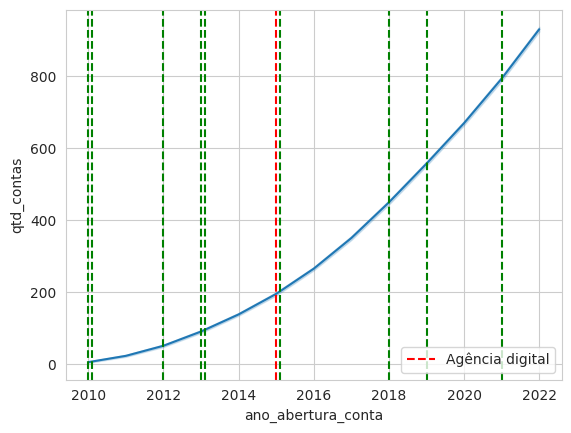

In [29]:
with sns.axes_style('whitegrid'):
    ax = sns.lineplot(data=df_quant_contas, x='ano_abertura_conta', y='qtd_contas')
    
    #linhas
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[0], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[0]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[1], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[2], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[2]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[3], color='red', linestyle='--', label='Agência digital')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[3]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[4], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[5], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[6], color='green', linestyle='--')

    ax.legend()
    plt.show()

Observa-se a aceleração da criação de contas a partir de 2015, quando foi criada a agência digital.

In [30]:
df_anos_contas = df_quant_contas[['ano_abertura_conta','num_conta']].groupby('ano_abertura_conta').count().sort_values('ano_abertura_conta')
df_anos_contas['crescimento'] = df_anos_contas['num_conta'].diff()
df_anos_contas

,num_conta,crescimento
ano_abertura_conta,,
2010,11,NaN
2011,24,13.0
2012,32,8.0
2013,47,15.0
2014,48,1.0
2015,66,18.0
2016,74,8.0
2017,96,22.0
2018,102,6.0


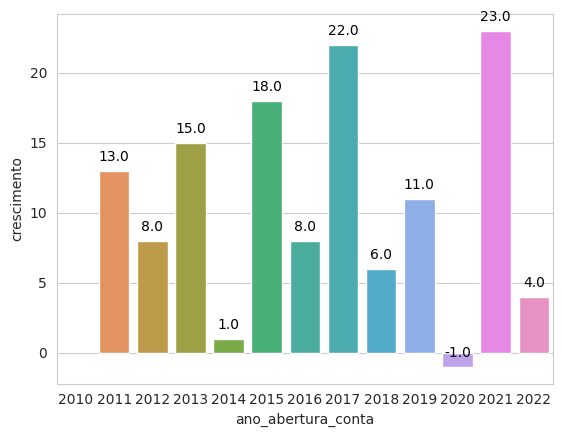

In [31]:
with sns.axes_style('whitegrid'):

    ax = sns.barplot(x=df_anos_contas.index,
                y=df_anos_contas.crescimento)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## KPI - crescimento da agência (tempo em meses x nº de contas)

Criando um indicador para analisar o crescimento da quantidade de contas por agência, considerando a idade em meses de abertura.

In [32]:
kpi_crescimento = df_contas_total[['nome_completo_y','tempo_agencia_meses','num_conta']].groupby(['nome_completo_y','tempo_agencia_meses']).count()

kpi_crescimento['kpi_crescimento_mensal'] = kpi_crescimento['num_conta'] / kpi_crescimento.index.get_level_values('tempo_agencia_meses')
kpi_crescimento = kpi_crescimento.sort_values('kpi_crescimento_mensal', ascending=False)
kpi_crescimento

,,num_conta,kpi_crescimento_mensal
nome_completo_y,tempo_agencia_meses,,
Agência Digital - São Paulo/SP,102,460,4.509804
Agência Matriz - São Paulo/SP,169,119,0.704142
Agência Tatuapé - São Paulo/SP,163,101,0.619632
Agência Florianópolis - Florianópolis/SC,52,30,0.576923
Agência Campinas - Campinas/SP,143,76,0.531469
Agência Osasco - Osasco/SP,123,65,0.528455
Agência Porto Alegre - Porto Alegre/RS,122,61,0.500000
Agência Rio de Janeiro - Rio de Janeiro/RJ,106,52,0.490566
Agência Jardins - São Paulo/SP,73,30,0.410959


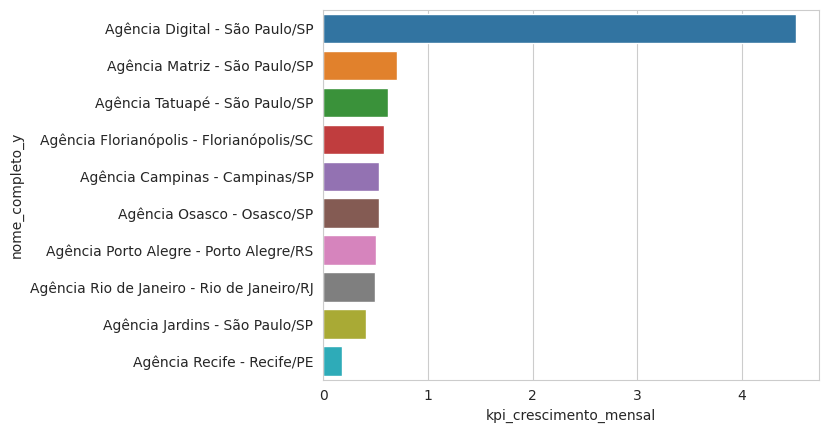

In [33]:
with sns.axes_style('whitegrid'):
    sns.barplot(x = kpi_crescimento.kpi_crescimento_mensal,
               y = kpi_crescimento.index.get_level_values('nome_completo_y'))
    plt.show()

Avalia-se portanto quão eficiente é uma agência digital e o potencial que este pode atingir no alcance de mais clientes.

## Avaliação de atividades das Contas

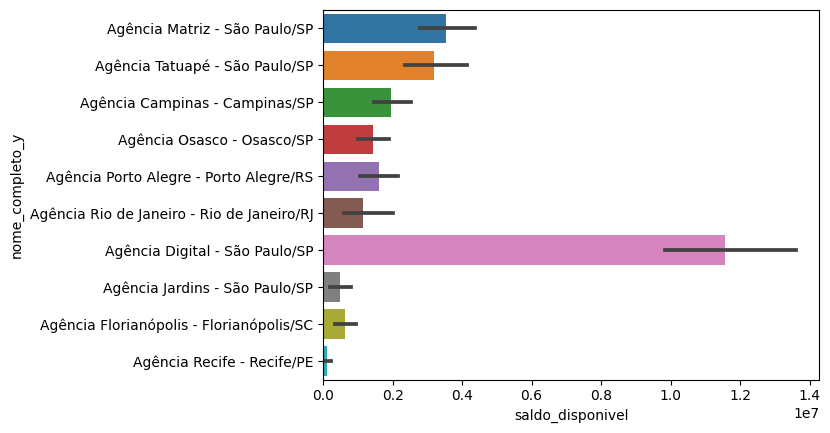

In [34]:
sns.barplot(data=df_contas_total,
            x = 'saldo_disponivel',
           y = 'nome_completo_y',
           estimator = 'sum',
           hue_order = 'saldo_disponivel')
plt.show()

## Avaliação de última movimentação

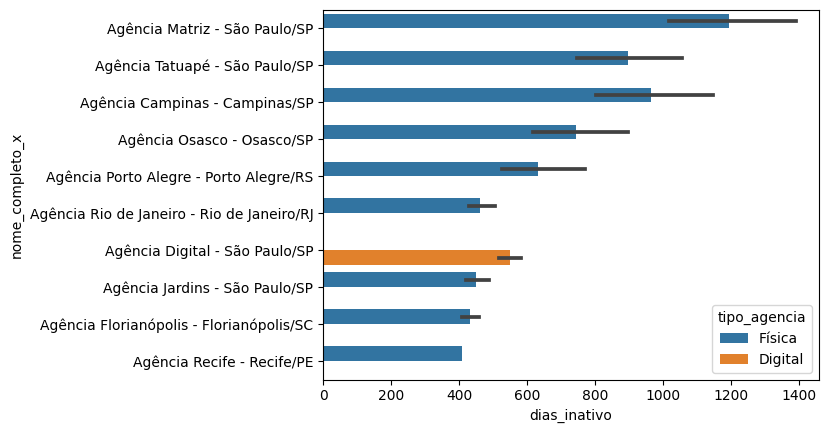

In [35]:
sns.barplot(x = df_contas_total.dias_inativo,
            y = df_contas_total.nome_completo_x,
            hue = df_contas_total.tipo_agencia)
plt.show()

In [36]:
df_agencias[['nome','data_abertura_agencia']].sort_values('data_abertura_agencia')

,nome,data_abertura_agencia
cod_agencia,,
1,Agência Matriz,2010-01-01
2,Agência Tatuapé,2010-06-14
3,Agência Campinas,2012-03-04
4,Agência Osasco,2013-11-06
5,Agência Porto Alegre,2013-12-01
6,Agência Rio de Janeiro,2015-04-01
7,Agência Digital,2015-08-01
8,Agência Jardins,2018-01-09
9,Agência Florianópolis,2019-10-09


Assim observamos que a quantidade de dias inarivos não são influenciados por tipo de conta, mas predominanemente pela idade da conta.

# Dashboard

Através do [Painel dinâmico](https://lookerstudio.google.com/reporting/671aeb89-9fa4-4e31-bf11-be3ce048046c), é possível avaliar os dados. 